In [44]:
# imports
import pandas as pd
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# image visualisation
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


# Preparing ISIC 2020 Data for ML

In [45]:
# Attempt to read the file with different encodings
try:
    df_isic = pd.read_csv("data/ISIC_2020_Training_GroundTruth_v2.csv", encoding='utf-8')
except UnicodeDecodeError:
    try:
        df_isic = pd.read_csv("data/ISIC_2020_Training_GroundTruth_v2.csv", encoding='latin-1')
    except UnicodeDecodeError:
        df_isic = pd.read_csv("data/ISIC_2020_Training_GroundTruth_v2.csv", encoding='cp1252')

# Print data types of variables
print('Data Types')
print(df_isic.info())

# Display summary statistics
print('\nSummary Statistics')
print(df_isic.describe())

# Check for null values
print('\nCheck for Null')
print(df_isic.isna().any())

# View data frames
df_isic

Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   lesion_id                      33126 non-null  object 
 3   sex                            33061 non-null  object 
 4   age_approx                     33058 non-null  float64
 5   anatom_site_general_challenge  32599 non-null  object 
 6   diagnosis                      33126 non-null  object 
 7   benign_malignant               33126 non-null  object 
 8   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 2.3+ MB
None

Summary Statistics
         age_approx        target
count  33058.000000  33126.000000
mean      48.870016      0.017630
std       14.380360      0.13160

,image_name,patient_id,lesion_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,IL_7972535,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,IL_4649854,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,IL_9087444,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,IL_4255399,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,IL_6898037,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,IL_2076932,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,IL_6891604,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,IL_6364820,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,IL_6048457,male,50.0,lower extremity,unknown,benign,0


# Reduce number of classes
atypical melanocytic proliferation - categorized as 'akiec' <br>
cafe-au-lait macule - categorized as 'bcc' <br>
lentigo NOS - categorized as 'bkl' <br>
lichenoid keratosis - categorized as 'df' <br>
melanoma - categorized as 'mel' <br>
nevus - categorized as 'nv' <br>
seborrheic keratosis - categorized as 'bkl'<br>
solar lentigo - categorized as 'vasc'

In [46]:
#drop
df_cleaned_isic = df_isic.drop(columns=['benign_malignant','target' ,'patient_id' , 'lesion_id',])

# drop unknown diagnosis
df_cleaned_isic = df_cleaned_isic[df_cleaned_isic['diagnosis'] != 'unknown']

# Remove rows with missing data
df_cleaned_isic = df_cleaned_isic.dropna()

# encode categorical data - sex, localisation
one_hot_encoded_anatom = pd.get_dummies(df_cleaned_isic['anatom_site_general_challenge'])
df_cleaned_isic = pd.concat([df_cleaned_isic, one_hot_encoded_anatom], axis=1)

one_hot_encoded_sex = pd.get_dummies(df_cleaned_isic['sex'])
df_cleaned_isic = pd.concat([df_cleaned_isic, one_hot_encoded_sex], axis=1)

df_cleaned_isic = df_cleaned_isic.drop(columns=['sex', 'anatom_site_general_challenge'])

# Replace values in the 'diagnosis' column using the mapping dictionary
mapping = {
    'atypical melanocytic proliferation': 'akiec',
    'cafe-au-lait macule': 'bcc',
    'lentigo NOS': 'bkl',
    'lichenoid keratosis': 'df',
    'melanoma': 'mel',
    'nevus': 'nv',
    'solar lentigo': 'vasc',
    'seborrheic keratosis': 'bkl'
}

df_cleaned_isic['diagnosis'] = df_cleaned_isic['diagnosis'].replace(mapping)

# call diagnosis column "target" and put target at the end
df_cleaned_isic = df_cleaned_isic.rename(columns={'diagnosis': 'target'})

columns = list(df_cleaned_isic.columns)
columns.remove('target')
columns.append('target')

df_cleaned_isic = df_cleaned_isic[columns]

df_cleaned_isic

,image_name,age_approx,head/neck,lower extremity,oral/genital,palms/soles,torso,upper extremity,female,male,target
2,ISIC_0052212,50.0,0,1,0,0,0,0,1,0,nv
12,ISIC_0076995,55.0,0,0,0,0,1,0,1,0,nv
26,ISIC_0084086,60.0,0,1,0,0,0,0,0,1,nv
27,ISIC_0084270,40.0,0,1,0,0,0,0,0,1,nv
28,ISIC_0084395,45.0,0,0,0,0,1,0,1,0,nv
...,...,...,...,...,...,...,...,...,...,...,...
33108,ISIC_9995691,50.0,0,0,0,0,0,1,0,1,nv
33113,ISIC_9997614,50.0,0,0,0,0,0,1,1,0,nv
33117,ISIC_9998682,60.0,1,0,0,0,0,0,0,1,mel
33118,ISIC_9998937,40.0,1,0,0,0,0,0,0,1,nv


In [47]:
# turn image_name into image_id for easy concatenation
df_cleaned_isic = df_cleaned_isic.rename(columns={'image_name': 'image_id'})

# turn age_approx into age for easy concatenation
df_cleaned_isic = df_cleaned_isic.rename(columns={'age_approx': 'age'})

df_cleaned_isic

,image_id,age,head/neck,lower extremity,oral/genital,palms/soles,torso,upper extremity,female,male,target
2,ISIC_0052212,50.0,0,1,0,0,0,0,1,0,nv
12,ISIC_0076995,55.0,0,0,0,0,1,0,1,0,nv
26,ISIC_0084086,60.0,0,1,0,0,0,0,0,1,nv
27,ISIC_0084270,40.0,0,1,0,0,0,0,0,1,nv
28,ISIC_0084395,45.0,0,0,0,0,1,0,1,0,nv
...,...,...,...,...,...,...,...,...,...,...,...
33108,ISIC_9995691,50.0,0,0,0,0,0,1,0,1,nv
33113,ISIC_9997614,50.0,0,0,0,0,0,1,1,0,nv
33117,ISIC_9998682,60.0,1,0,0,0,0,0,0,1,mel
33118,ISIC_9998937,40.0,1,0,0,0,0,0,0,1,nv


In [48]:
#save df to csv
df_cleaned_isic.to_csv('data/ISIC_2020_Training_GroundTruth_v2_prepared.csv', index=False)

# Preparing HAM 10000 Data for ML

In [49]:
# Attempt to read the file with different encodings
try:
    df_ham = pd.read_csv("data/HAM 10000/HAM10000_metadata.csv", encoding='utf-8')
except UnicodeDecodeError:
    try:
        df_ham = pd.read_csv("data/HAM 10000/HAM10000_metadata.csv", encoding='latin-1')
    except UnicodeDecodeError:
        df_ham = pd.read_csv("data/HAM 10000/HAM10000_metadata.csv", encoding='cp1252')

# Print data types of variables
print('Data Types')
print(df_ham.info())

# Display summary statistics
print('\nSummary Statistics')
print(df_ham.describe())

# Check for null values
print('\nCheck for Null')
print(df_ham.isna().any())

# View data frames
df_ham

Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
None

Summary Statistics
               age
count  9958.000000
mean     51.863828
std      16.968614
min       0.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      85.000000

Check for Null
lesion_id       False
image_id        False
dx              False
dx_type         False
age              True
sex             False
localization    False
dtype: bool


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [50]:
#drop dx_type and lesion_id as not needed
df_cleaned_ham = df_ham.drop(columns=['dx_type', 'lesion_id'])

# drop rows with missing values
df_cleaned_ham = df_cleaned_ham.dropna()

# drop rows where gender and localiztion is unknown
df_cleaned_ham = df_cleaned_ham[df_cleaned_ham['sex'] != 'unknown']
df_cleaned_ham = df_cleaned_ham[df_cleaned_ham['localization'] != 'unknown']

# encode categorical data - sex, localisation
one_hot_encoded_anatom = pd.get_dummies(df_cleaned_ham['localization'])
df_cleaned_ham = pd.concat([df_cleaned_ham, one_hot_encoded_anatom], axis=1)


one_hot_encoded_sex = pd.get_dummies(df_cleaned_ham['sex'])
df_cleaned_ham = pd.concat([df_cleaned_ham, one_hot_encoded_sex], axis=1)

df_cleaned_ham = df_cleaned_ham.drop(columns=['sex', 'localization'])

# rename dx to target and put it in the last column
df_cleaned_ham.rename(columns={'dx': 'target'}, inplace=True)
columns = list(df_cleaned_ham.columns)
columns.remove('target')
columns.append('target')

df_cleaned_ham = df_cleaned_ham[columns]

df_cleaned_ham

,image_id,age,abdomen,acral,back,chest,ear,face,foot,genital,hand,lower extremity,neck,scalp,trunk,upper extremity,female,male,target
0,ISIC_0027419,80.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,bkl
1,ISIC_0025030,80.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,bkl
2,ISIC_0026769,80.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,bkl
3,ISIC_0025661,80.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,bkl
4,ISIC_0031633,75.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,bkl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,ISIC_0033084,40.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,akiec
10011,ISIC_0033550,40.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,akiec
10012,ISIC_0033536,40.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,akiec
10013,ISIC_0032854,80.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,akiec


# Combine some localizations together
## For easy concatenation, so that fit into the same categories as ISIC 2020

These categories include: head/neck, lower extremity, oral/genital, palms/soles, torso, upper extremity 

In [51]:
# create 'head/neck' by combining 'face', 'ear', 'neck', 'scalp'
df_cleaned_ham['head/neck'] = df_cleaned_ham[['face', 'ear', 'neck', 'scalp']].sum(axis=1)
df_cleaned_ham = df_cleaned_ham.drop(columns=['face', 'ear', 'neck', 'scalp'])

# create 'oral/genital' by calling 'genital' 'oral/genital'
df_cleaned_ham.rename(columns={'genital': 'oral/genital'}, inplace=True)

# create 'palms/soles' by combining 'foot', 'hand'
df_cleaned_ham['palms/soles'] = df_cleaned_ham[['foot', 'hand']].sum(axis=1)
df_cleaned_ham = df_cleaned_ham.drop(columns=['foot', 'hand'])

# create 'torso' by combining 'abdomen', 'acral', 'back', 'chest', 'trunk'
df_cleaned_ham['torso'] = df_cleaned_ham[['abdomen', 'acral', 'back', 'chest', 'trunk']].sum(axis=1)
df_cleaned_ham = df_cleaned_ham.drop(columns=['abdomen', 'acral', 'back', 'chest', 'trunk'])

df_cleaned_ham

,image_id,age,oral/genital,lower extremity,upper extremity,female,male,target,head/neck,palms/soles,torso
0,ISIC_0027419,80.0,0,0,0,0,1,bkl,1,0,0
1,ISIC_0025030,80.0,0,0,0,0,1,bkl,1,0,0
2,ISIC_0026769,80.0,0,0,0,0,1,bkl,1,0,0
3,ISIC_0025661,80.0,0,0,0,0,1,bkl,1,0,0
4,ISIC_0031633,75.0,0,0,0,0,1,bkl,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10010,ISIC_0033084,40.0,0,0,0,0,1,akiec,0,0,1
10011,ISIC_0033550,40.0,0,0,0,0,1,akiec,0,0,1
10012,ISIC_0033536,40.0,0,0,0,0,1,akiec,0,0,1
10013,ISIC_0032854,80.0,0,0,0,0,1,akiec,1,0,0


In [52]:
#save df to csv
df_cleaned_isic.to_csv('data/HAM 10000/HAM10000_metadata_prepared.csv', index=False)

# Combine HAM10000 and ISIC 2020

In [53]:
combined_df = pd.concat([df_cleaned_isic, df_cleaned_ham], ignore_index=True)
combined_df

,image_id,age,head/neck,lower extremity,oral/genital,palms/soles,torso,upper extremity,female,male,target
0,ISIC_0052212,50.0,0,1,0,0,0,0,1,0,nv
1,ISIC_0076995,55.0,0,0,0,0,1,0,1,0,nv
2,ISIC_0084086,60.0,0,1,0,0,0,0,0,1,nv
3,ISIC_0084270,40.0,0,1,0,0,0,0,0,1,nv
4,ISIC_0084395,45.0,0,0,0,0,1,0,1,0,nv
...,...,...,...,...,...,...,...,...,...,...,...
15697,ISIC_0033084,40.0,0,0,0,0,1,0,0,1,akiec
15698,ISIC_0033550,40.0,0,0,0,0,1,0,0,1,akiec
15699,ISIC_0033536,40.0,0,0,0,0,1,0,0,1,akiec
15700,ISIC_0032854,80.0,1,0,0,0,0,0,0,1,akiec


In [54]:
unique_value = combined_df['target'].unique()

print(unique_value)

# if 'ISIC_4478337' in combined_df['image_id'].values:
#     print("Yes")

['nv' 'mel' 'bkl' 'df' 'vasc' 'bcc' 'akiec']


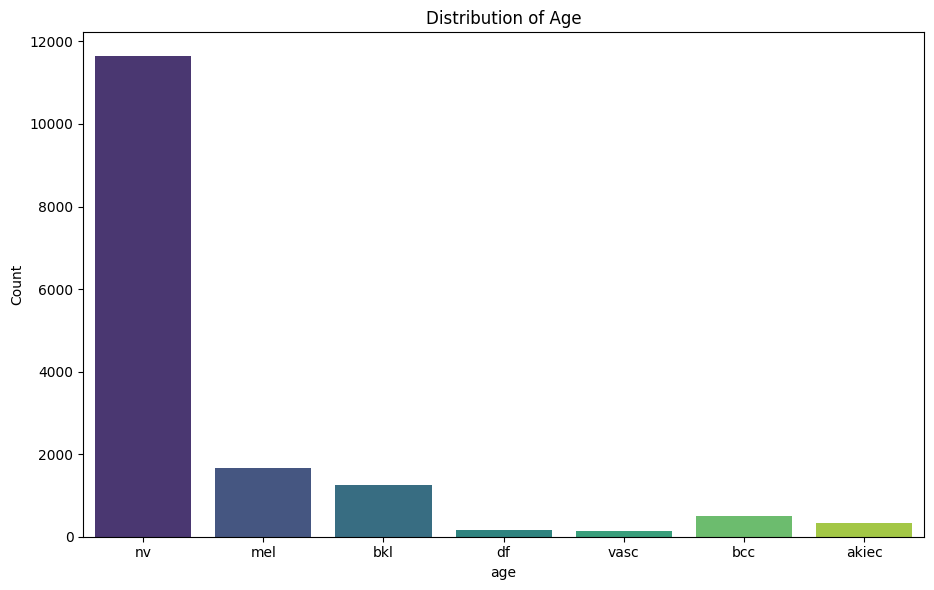

In [55]:
# Distribution of Target
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=combined_df['target'], palette='viridis')
plt.title('Distribution of Age')
plt.xlabel('age')
plt.ylabel('Count')

# Add some space between subplots
plt.tight_layout()

plt.show()

In [56]:
combined_df.to_csv('data/combined_data_prepared.csv', index=False)

In [57]:
# Assuming df is your DataFrame and 'column_name' is the name of the column you're interested in
value_counts = combined_df['target'].value_counts()

# To get the count of a specific value, for example 'specific_value'
nv_count = value_counts['nv']
mel_count = value_counts['mel']
bkl_count = value_counts['bkl']
df_count = value_counts['df']
vasc_count = value_counts['vasc']
bcc_count = value_counts['bcc']
akiec_count = value_counts['akiec']


print('nv', nv_count)
print('mel', mel_count)
print('bkl', bkl_count)
print('df', df_count)
print('vasc', vasc_count)
print('bcc', bcc_count)
print('akiec', akiec_count)

nv 11638
mel 1676
bkl 1250
df 151
vasc 149
bcc 510
akiec 328


In [66]:
df_class_0 = combined_df[combined_df['target'] == 'nv']
df_class_1 = combined_df[combined_df['target'] == 'mel']
df_class_2 = combined_df[combined_df['target'] == 'bkl']
df_class_3 = combined_df[combined_df['target'] == 'df']
df_class_4 = combined_df[combined_df['target'] == 'vasc']
df_class_5 = combined_df[combined_df['target'] == 'bcc']
df_class_6 = combined_df[combined_df['target'] == 'akiec']

# Resample to get 1000 rows for each class
df_class_0_resampled = df_class_0.sample(n=200, replace=True, random_state=42)
df_class_1_resampled = df_class_1.sample(n=200, replace=True, random_state=42)
df_class_2_resampled = df_class_2.sample(n=200, replace=True, random_state=42)
df_class_3_resampled = df_class_3.sample(n=200, replace=True, random_state=42)
df_class_4_resampled = df_class_4.sample(n=200, replace=True, random_state=42)
df_class_5_resampled = df_class_5.sample(n=200, replace=True, random_state=42)
df_class_6_resampled = df_class_6.sample(n=200, replace=True, random_state=42)

# Concatenate the resampled DataFrames
df_resampled = pd.concat([df_class_0_resampled, df_class_1_resampled, df_class_2_resampled, df_class_3_resampled, df_class_4_resampled, df_class_5_resampled, df_class_6_resampled])

# Shuffle the DataFrame to mix the rows
df_resampled = df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [72]:
# Path to your image folder
image_folder = 'images'

# Get the list of image IDs from your DataFrame
image_ids = df_resampled['image_id']

# Get the list of filenames in the image folder
folder_filenames = os.listdir(image_folder)

# Iterate over the files in the image folder
for filename in folder_filenames:
    # Check if the file is an image file (e.g., .jpg or .png)
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        # Extract the image ID from the filename
        image_id = os.path.splitext(filename)[0]
        # Check if the image ID is not in the DataFrame
        if image_id not in image_ids.values:
            # If not in DataFrame, delete the file
            os.remove(os.path.join(image_folder, filename))
            print(f"Deleted: {filename}")

# Check for missing files in DataFrame but not in folder
for image_id in image_ids:
    # Check if the image ID is not in the list of filenames in the folder
    if f"{image_id}.jpg" not in folder_filenames and f"{image_id}.png" not in folder_filenames:
        print(f"File for image ID '{image_id}' is missing from the folder.")

Deleted: ISIC_0024306.jpg
Deleted: ISIC_0024307.jpg
Deleted: ISIC_0024308.jpg
Deleted: ISIC_0024309.jpg
Deleted: ISIC_0024311.jpg
Deleted: ISIC_0024312.jpg
Deleted: ISIC_0024314.jpg
Deleted: ISIC_0024315.jpg
Deleted: ISIC_0024316.jpg
Deleted: ISIC_0024317.jpg
Deleted: ISIC_0024319.jpg
Deleted: ISIC_0024320.jpg
Deleted: ISIC_0024321.jpg
Deleted: ISIC_0024322.jpg
Deleted: ISIC_0024324.jpg
Deleted: ISIC_0024325.jpg
Deleted: ISIC_0024326.jpg
Deleted: ISIC_0024327.jpg
Deleted: ISIC_0024328.jpg
Deleted: ISIC_0024329.jpg
Deleted: ISIC_0024333.jpg
Deleted: ISIC_0024334.jpg
Deleted: ISIC_0024335.jpg
Deleted: ISIC_0024336.jpg
Deleted: ISIC_0024337.jpg
Deleted: ISIC_0024338.jpg
Deleted: ISIC_0024339.jpg
Deleted: ISIC_0024340.jpg
Deleted: ISIC_0024341.jpg
Deleted: ISIC_0024342.jpg
Deleted: ISIC_0024343.jpg
Deleted: ISIC_0024344.jpg
Deleted: ISIC_0024345.jpg
Deleted: ISIC_0024346.jpg
Deleted: ISIC_0024347.jpg
Deleted: ISIC_0024348.jpg
Deleted: ISIC_0024349.jpg
Deleted: ISIC_0024350.jpg
Deleted: ISI

In [73]:
df_resampled

# Assuming df is your DataFrame and 'column_name' is the name of the column you're interested in
value_counts = df_resampled['target'].value_counts()

print(value_counts)

df       200
nv       200
bkl      200
mel      200
vasc     200
bcc      200
akiec    200
Name: target, dtype: int64


In [74]:
# List of image IDs
image_ids = df_resampled['image_id'].tolist()

# List of filenames in the folder
folder_filenames = os.listdir('images')

# Check if the image ID corresponds to an image file in the folder
valid_image_ids = []
for image_id in image_ids:
    # Check if the image ID has a corresponding image file in the folder
    if f"{image_id}.jpg" in folder_filenames or f"{image_id}.png" in folder_filenames:
        valid_image_ids.append(image_id)

# Filter the DataFrame to keep only the rows with valid image IDs
filtered_df = df_resampled[df_resampled['image_id'].isin(valid_image_ids)]

# Now filtered_df contains only the rows with image IDs that have corresponding image files in the folder

In [75]:
filtered_df

,image_id,age,head/neck,lower extremity,oral/genital,palms/soles,torso,upper extremity,female,male,target
0,ISIC_5136612,65.0,0,0,0,0,1,0,0,1,df
1,ISIC_0031002,65.0,0,0,0,0,0,1,0,1,df
2,ISIC_0026875,35.0,0,0,0,0,0,1,1,0,nv
3,ISIC_0024371,70.0,0,1,0,0,0,0,0,1,bkl
4,ISIC_0027263,85.0,0,0,0,0,1,0,0,1,mel
...,...,...,...,...,...,...,...,...,...,...,...
1395,ISIC_0027531,65.0,0,1,0,0,0,0,0,1,bcc
1396,ISIC_0025691,50.0,0,0,0,0,1,0,1,0,bcc
1397,ISIC_0028381,55.0,1,0,0,0,0,0,1,0,akiec
1398,ISIC_0033254,15.0,0,0,0,0,1,0,0,1,vasc


In [85]:
df_resampled

,image_id,age,head/neck,lower extremity,oral/genital,palms/soles,torso,upper extremity,female,male,target
0,ISIC_5136612,65.0,0,0,0,0,1,0,0,1,df
1,ISIC_0031002,65.0,0,0,0,0,0,1,0,1,df
2,ISIC_0026875,35.0,0,0,0,0,0,1,1,0,nv
3,ISIC_0024371,70.0,0,1,0,0,0,0,0,1,bkl
4,ISIC_0027263,85.0,0,0,0,0,1,0,0,1,mel
...,...,...,...,...,...,...,...,...,...,...,...
1395,ISIC_0027531,65.0,0,1,0,0,0,0,0,1,bcc
1396,ISIC_0025691,50.0,0,0,0,0,1,0,1,0,bcc
1397,ISIC_0028381,55.0,1,0,0,0,0,0,1,0,akiec
1398,ISIC_0033254,15.0,0,0,0,0,1,0,0,1,vasc


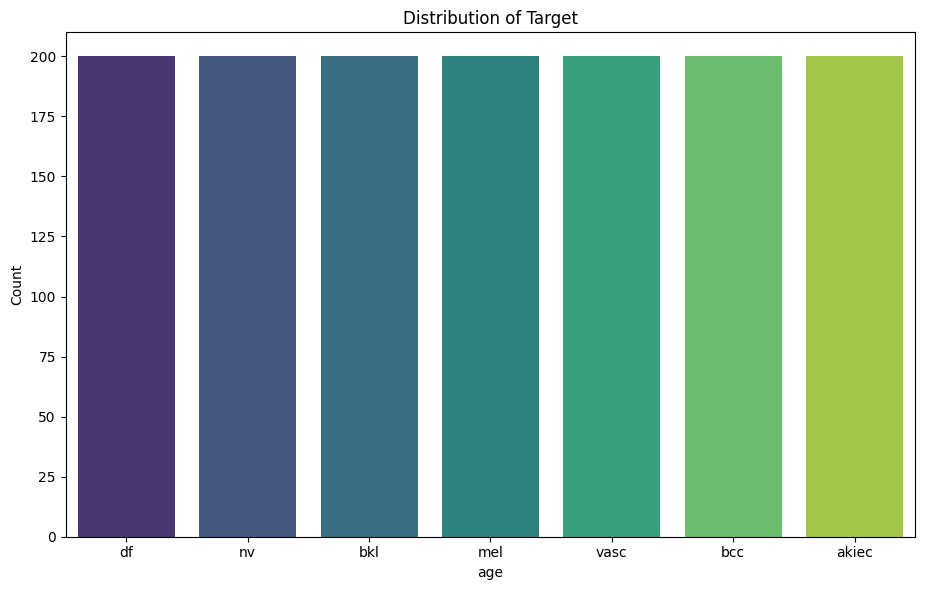

In [77]:
# Distribution of Target
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=df_resampled['target'], palette='viridis')
plt.title('Distribution of Target')
plt.xlabel('age')
plt.ylabel('Count')

# Add some space between subplots
plt.tight_layout()

plt.show()

In [78]:
folder_path = 'images'

# List all files in the folder
all_files = os.listdir(folder_path)

# Filter out only the image files (assuming jpg and png extensions)
image_files = [file for file in all_files if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]

# Get the count of image files
num_photos = len(image_files)

# Print the number of photos in the folder
print(f'Number of photos in the folder: {num_photos}')

Number of photos in the folder: 1086


In [86]:
import os

# Load the dataset
data = df_resampled

# List of image IDs from metadata
metadata_image_ids = set(data['image_id'])

# Directory containing image files
image_directory = "images"

# List of image files in the directory
image_files = os.listdir(image_directory)

# Set of image IDs from image files
image_file_ids = {file.split('.')[0] for file in image_files}

# Find missing image IDs
missing_image_ids = metadata_image_ids - image_file_ids

if missing_image_ids:
    print("Missing image IDs:")
    print(missing_image_ids)
else:
    print("No missing images found.")


# Count the number of missing image IDs
num_missing_ids = len(missing_image_ids)

print("Number of missing image IDs:", len(missing_image_ids))


No missing images found.
Number of missing image IDs: 0


In [87]:
import pandas as pd

# Load the dataset
data = df_resampled

# Check for duplicates in the 'image_id' column
duplicate_ids = data['image_id'].value_counts()

# Filter duplicate IDs
duplicate_ids = duplicate_ids[duplicate_ids > 1]

# Print the duplicate IDs and their counts
if duplicate_ids.empty:
    print("No duplicate image IDs found.")
else:
    print("Duplicate image IDs and their counts:")
    print(duplicate_ids)


Duplicate image IDs and their counts:
ISIC_5136612    5
ISIC_0029052    5
ISIC_0025250    5
ISIC_0030275    5
ISIC_0034169    4
               ..
ISIC_0025622    2
ISIC_0026872    2
ISIC_0032138    2
ISIC_8609756    2
ISIC_0030825    2
Name: image_id, Length: 225, dtype: int64


In [88]:
import os
from shutil import copyfile

# Load the dataset
data = df_resampled

# Check for duplicates in the 'image_id' column
duplicate_ids = data['image_id'].value_counts()

# Filter duplicate IDs
duplicate_ids = duplicate_ids[duplicate_ids > 1]

# Duplicate images corresponding to duplicate IDs
for image_id, count in duplicate_ids.items():
    # Find the corresponding image file path
    image_path = os.path.join(image_directory, image_id + '.jpg')

    # Create copies of the image file until it matches the count in metadata
    for i in range(count - 1):
        copyfile(image_path, f"{image_path[:-4]}_{i + 1}.jpg")


In [89]:
folder_path = 'images'

# List all files in the folder
all_files = os.listdir(folder_path)

# Filter out only the image files (assuming jpg and png extensions)
image_files = [file for file in all_files if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]

# Get the count of image files
num_photos = len(image_files)

# Print the number of photos in the folder
print(f'Number of photos in the folder: {num_photos}')

Number of photos in the folder: 1400
